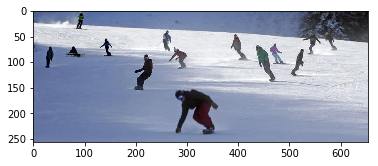

In [19]:
import matplotlib.pyplot as plt  # za prikaz slika, grafika, itd.
%matplotlib inline
# %matplotlib inline je komanda za prikaz slika i grafika unutar notebook-a (ne koristiti u običnim skriptama!!!)

import numpy as np
from skimage.io import imread

img = imread('images/snowboarders.jpg')  # img je Numpy array
plt.imshow(img)

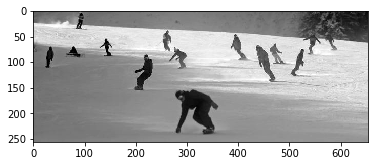

In [20]:
from skimage.color import rgb2gray
img_gray = rgb2gray(img)
plt.imshow(img_gray, 'gray')

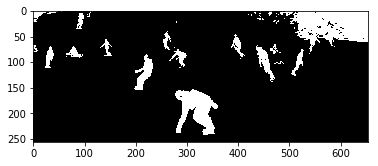

In [21]:
from skimage.filters import threshold_adaptive, threshold_yen

thresh = threshold_yen(img_gray)
img_tr = img_gray <= thresh

plt.imshow(img_tr, 'gray')

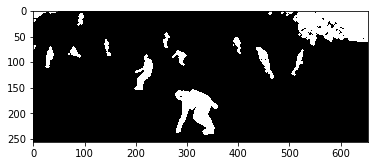

In [22]:
from skimage.morphology import opening, closing, binary_opening
from skimage.morphology import square, diamond, disk
from skimage.morphology import erosion

str_elem = disk(2)
img_tr_open = opening(img_tr, selem=str_elem)
plt.imshow(img_tr_open, 'gray')

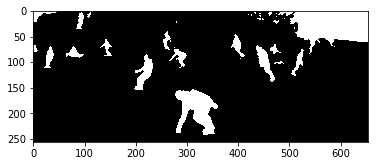

In [23]:
img_tr_close = closing(img_tr, selem=str_elem)
plt.imshow(img_tr_close, 'gray')

In [24]:
from skimage.measure import label  # implementacija connected-components labelling postupka
from skimage.measure import regionprops 

labeled_img = label(img_tr_close,8)  # rezultat je slika sa obeleženim regionima
regions = regionprops(labeled_img)


In [25]:
def draw_regions(regs, img_size):
    img_r = np.ndarray((img_size[0], img_size[1]), dtype='float32')
    for reg in regs:
        coords = reg.coords  # coords vraca koordinate svih tacaka regiona
        for coord in coords:
            if coord[0] < 50 and coord[1] < 70:
                img_r[coord[0], coord[1]] = 0;
            else:
                img_r[coord[0], coord[1]] = 1.
    return img_r

In [26]:
areas = []
for region in regions:
    x = region.area
    if x > 100 and x < 6000:
        areas.append(region)

Ukupan broj regiona: 12


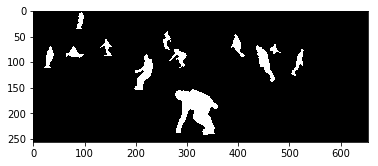

In [27]:
final_img = draw_regions(areas, img_tr_close.shape);
plt.imshow(final_img, 'gray')

labeled_img = label(final_img)  # rezultat je slika sa obeleženim regionima
snowboarders = regionprops(labeled_img)
print('Ukupan broj regiona: {}'.format(len(snowboarders)))